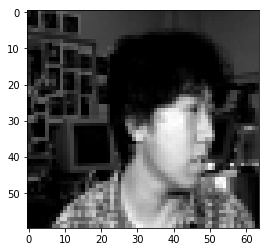

In [200]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
%matplotlib inline

LeftDemo = np.array(Image.open('./faces/left1.pgm'))
plt.imshow(LeftDemo, cmap = 'gist_gray')

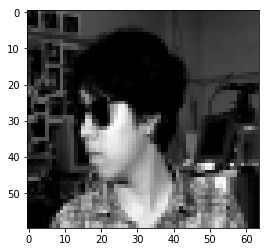

In [201]:
RightDemo = np.array(Image.open('./faces/right1.pgm'))
plt.imshow(RightDemo, cmap = 'gist_gray')

In [222]:
def load_images(DIR):
    trainData = []
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            # assign label based on label in directory
            if "left" in path:
                label = 1
            else:
                label = 0 
            # load image
            imgData = np.array(Image.open(path))
            # Convert 60x64 image matrix into 3840x1 vector
            imgData = imgData.flatten()
            # Normalize vals between 0 and 1
            maxVal = np.max(imgData)
            minVal = np.min(imgData)
            for i in range(len(imgData)):
                imgData[i] = (imgData[i] - minVal) / (maxVal - minVal)
                
            trainData.append([np.array(imgData), label])
    #randomize ordering of left - right images for partition
    shuffle(trainData)
    return trainData

In [223]:
faceData = np.array(load_images('./faces/'))
print(len(faceData))

100


In [224]:
train = faceData[:40]
test = faceData[:-40]


#trainImages = np.array(trainImages)

# format data for Keras input_dim, 40x2 --> 40x3840
trainImages = np.array([i[0] for i in train]).reshape(-1, 3840)
trainLabels = [i[1] for i in train]
print(trainLabels)

testImages = np.array([i[0] for i in test]).reshape(-1, 3840)
testLabels = [i[1] for i in test]
# Console Output to test reshape functions
#print(trainImages.shape)
#print(trainLabels)

[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [225]:
# Import Keras Depedencies
from keras.models import Sequential
from keras.layers import Dense

In [226]:
# Model 1 - One Hidden Layer, 3 Hidden Nodes
model1 = Sequential()
model1.add(Dense(3, input_dim=3840, activation = 'sigmoid'))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(trainImages, trainLabels, epochs=1000, batch_size=16)

Epoch 1/1000
40/40 [==============================] - 1s 22ms/step - loss: 0.7133 - acc: 0.4750
Epoch 2/1000
40/40 [==============================] - 0s 157us/step - loss: 0.7117 - acc: 0.4750
Epoch 3/1000
40/40 [==============================] - 0s 145us/step - loss: 0.7103 - acc: 0.4750
Epoch 4/1000
40/40 [==============================] - 0s 153us/step - loss: 0.7089 - acc: 0.4750
Epoch 5/1000
40/40 [==============================] - 0s 152us/step - loss: 0.7080 - acc: 0.4750
Epoch 6/1000
40/40 [==============================] - 0s 164us/step - loss: 0.7065 - acc: 0.4750
Epoch 7/1000
40/40 [==============================] - 0s 148us/step - loss: 0.7051 - acc: 0.4750
Epoch 8/1000
40/40 [==============================] - 0s 160us/step - loss: 0.7042 - acc: 0.4750
Epoch 9/1000
40/40 [==============================] - 0s 154us/step - loss: 0.7029 - acc: 0.4750
Epoch 10/1000
40/40 [==============================] - 0s 152us/step - loss: 0.7019 - acc: 0.4750
Epoch 11/1000
40/40 [=========

40/40 [==============================] - 0s 180us/step - loss: 0.5620 - acc: 0.9500
Epoch 168/1000
40/40 [==============================] - 0s 154us/step - loss: 0.5608 - acc: 0.9500
Epoch 169/1000
40/40 [==============================] - 0s 123us/step - loss: 0.5597 - acc: 0.9500
Epoch 170/1000
40/40 [==============================] - 0s 130us/step - loss: 0.5586 - acc: 0.9500
Epoch 171/1000
40/40 [==============================] - 0s 122us/step - loss: 0.5574 - acc: 0.9500
Epoch 172/1000
40/40 [==============================] - 0s 136us/step - loss: 0.5564 - acc: 0.9500
Epoch 173/1000
40/40 [==============================] - 0s 138us/step - loss: 0.5552 - acc: 0.9500
Epoch 174/1000
40/40 [==============================] - 0s 207us/step - loss: 0.5540 - acc: 0.9500
Epoch 175/1000
40/40 [==============================] - 0s 162us/step - loss: 0.5528 - acc: 0.9500
Epoch 176/1000
40/40 [==============================] - 0s 157us/step - loss: 0.5517 - acc: 0.9500
Epoch 177/1000
40/40 [===

40/40 [==============================] - 0s 141us/step - loss: 0.3839 - acc: 0.9500
Epoch 332/1000
40/40 [==============================] - 0s 135us/step - loss: 0.3830 - acc: 0.9500
Epoch 333/1000
40/40 [==============================] - 0s 137us/step - loss: 0.3820 - acc: 0.9500
Epoch 334/1000
40/40 [==============================] - 0s 145us/step - loss: 0.3811 - acc: 0.9500
Epoch 335/1000
40/40 [==============================] - 0s 152us/step - loss: 0.3802 - acc: 0.9500
Epoch 336/1000
40/40 [==============================] - 0s 148us/step - loss: 0.3793 - acc: 0.9500
Epoch 337/1000
40/40 [==============================] - 0s 135us/step - loss: 0.3783 - acc: 0.9500
Epoch 338/1000
40/40 [==============================] - 0s 150us/step - loss: 0.3774 - acc: 0.9500
Epoch 339/1000
40/40 [==============================] - 0s 212us/step - loss: 0.3765 - acc: 0.9500
Epoch 340/1000
40/40 [==============================] - 0s 177us/step - loss: 0.3756 - acc: 0.9500
Epoch 341/1000
40/40 [===

40/40 [==============================] - 0s 147us/step - loss: 0.2594 - acc: 0.9750
Epoch 496/1000
40/40 [==============================] - 0s 132us/step - loss: 0.2588 - acc: 0.9750
Epoch 497/1000
40/40 [==============================] - 0s 119us/step - loss: 0.2582 - acc: 0.9750
Epoch 498/1000
40/40 [==============================] - 0s 146us/step - loss: 0.2576 - acc: 0.9750
Epoch 499/1000
40/40 [==============================] - 0s 130us/step - loss: 0.2570 - acc: 0.9750
Epoch 500/1000
40/40 [==============================] - 0s 132us/step - loss: 0.2565 - acc: 0.9750
Epoch 501/1000
40/40 [==============================] - 0s 123us/step - loss: 0.2559 - acc: 0.9750
Epoch 502/1000
40/40 [==============================] - 0s 137us/step - loss: 0.2553 - acc: 0.9750
Epoch 503/1000
40/40 [==============================] - 0s 155us/step - loss: 0.2547 - acc: 0.9750
Epoch 504/1000
40/40 [==============================] - 0s 153us/step - loss: 0.2541 - acc: 0.9750
Epoch 505/1000
40/40 [===

40/40 [==============================] - 0s 126us/step - loss: 0.1835 - acc: 0.9750
Epoch 660/1000
40/40 [==============================] - 0s 130us/step - loss: 0.1832 - acc: 0.9750
Epoch 661/1000
40/40 [==============================] - 0s 128us/step - loss: 0.1828 - acc: 0.9750
Epoch 662/1000
40/40 [==============================] - 0s 128us/step - loss: 0.1825 - acc: 0.9750
Epoch 663/1000
40/40 [==============================] - 0s 139us/step - loss: 0.1821 - acc: 0.9750
Epoch 664/1000
40/40 [==============================] - 0s 144us/step - loss: 0.1818 - acc: 0.9750
Epoch 665/1000
40/40 [==============================] - 0s 133us/step - loss: 0.1814 - acc: 0.9750
Epoch 666/1000
40/40 [==============================] - 0s 166us/step - loss: 0.1811 - acc: 0.9750
Epoch 667/1000
40/40 [==============================] - 0s 164us/step - loss: 0.1808 - acc: 0.9750
Epoch 668/1000
40/40 [==============================] - 0s 168us/step - loss: 0.1804 - acc: 0.9750
Epoch 669/1000
40/40 [===

40/40 [==============================] - 0s 135us/step - loss: 0.1382 - acc: 0.9750
Epoch 824/1000
40/40 [==============================] - 0s 131us/step - loss: 0.1380 - acc: 0.9750
Epoch 825/1000
40/40 [==============================] - 0s 146us/step - loss: 0.1378 - acc: 0.9750
Epoch 826/1000
40/40 [==============================] - 0s 153us/step - loss: 0.1376 - acc: 0.9750
Epoch 827/1000
40/40 [==============================] - 0s 149us/step - loss: 0.1374 - acc: 0.9750
Epoch 828/1000
40/40 [==============================] - 0s 150us/step - loss: 0.1371 - acc: 0.9750
Epoch 829/1000
40/40 [==============================] - 0s 138us/step - loss: 0.1369 - acc: 0.9750
Epoch 830/1000
40/40 [==============================] - 0s 131us/step - loss: 0.1367 - acc: 0.9750
Epoch 831/1000
40/40 [==============================] - 0s 138us/step - loss: 0.1365 - acc: 0.9750
Epoch 832/1000
40/40 [==============================] - 0s 133us/step - loss: 0.1363 - acc: 0.9750
Epoch 833/1000
40/40 [===

40/40 [==============================] - 0s 165us/step - loss: 0.1106 - acc: 0.9750
Epoch 988/1000
40/40 [==============================] - 0s 139us/step - loss: 0.1105 - acc: 0.9750
Epoch 989/1000
40/40 [==============================] - 0s 132us/step - loss: 0.1104 - acc: 0.9750
Epoch 990/1000
40/40 [==============================] - 0s 152us/step - loss: 0.1102 - acc: 0.9750
Epoch 991/1000
40/40 [==============================] - 0s 134us/step - loss: 0.1101 - acc: 0.9750
Epoch 992/1000
40/40 [==============================] - 0s 141us/step - loss: 0.1100 - acc: 0.9750
Epoch 993/1000
40/40 [==============================] - 0s 166us/step - loss: 0.1098 - acc: 0.9750
Epoch 994/1000
40/40 [==============================] - 0s 152us/step - loss: 0.1097 - acc: 0.9750
Epoch 995/1000
40/40 [==============================] - 0s 147us/step - loss: 0.1096 - acc: 0.9750
Epoch 996/1000
40/40 [==============================] - 0s 136us/step - loss: 0.1094 - acc: 0.9750
Epoch 997/1000
40/40 [===

In [227]:
# Model 2 - One Hidden Layer, 5 Hidden Nodes
model2 = Sequential()
model2.add(Dense(5, input_dim=3840, activation = 'sigmoid'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(trainImages, trainLabels, epochs=1000, batch_size=16)

Epoch 1/1000
40/40 [==============================] - 1s 23ms/step - loss: 0.6936 - acc: 0.5250
Epoch 2/1000
40/40 [==============================] - 0s 146us/step - loss: 0.6922 - acc: 0.5250
Epoch 3/1000
40/40 [==============================] - 0s 157us/step - loss: 0.6909 - acc: 0.5250
Epoch 4/1000
40/40 [==============================] - 0s 148us/step - loss: 0.6895 - acc: 0.5250
Epoch 5/1000
40/40 [==============================] - 0s 153us/step - loss: 0.6884 - acc: 0.5250
Epoch 6/1000
40/40 [==============================] - 0s 162us/step - loss: 0.6873 - acc: 0.5250
Epoch 7/1000
40/40 [==============================] - 0s 155us/step - loss: 0.6861 - acc: 0.5250
Epoch 8/1000
40/40 [==============================] - 0s 163us/step - loss: 0.6850 - acc: 0.5250
Epoch 9/1000
40/40 [==============================] - 0s 174us/step - loss: 0.6839 - acc: 0.5250
Epoch 10/1000
40/40 [==============================] - 0s 143us/step - loss: 0.6827 - acc: 0.5250
Epoch 11/1000
40/40 [=========

40/40 [==============================] - 0s 156us/step - loss: 0.4805 - acc: 0.9750
Epoch 168/1000
40/40 [==============================] - 0s 156us/step - loss: 0.4790 - acc: 0.9750
Epoch 169/1000
40/40 [==============================] - 0s 165us/step - loss: 0.4776 - acc: 0.9750
Epoch 170/1000
40/40 [==============================] - 0s 151us/step - loss: 0.4761 - acc: 0.9750
Epoch 171/1000
40/40 [==============================] - 0s 138us/step - loss: 0.4747 - acc: 0.9750
Epoch 172/1000
40/40 [==============================] - 0s 155us/step - loss: 0.4734 - acc: 0.9750
Epoch 173/1000
40/40 [==============================] - 0s 151us/step - loss: 0.4719 - acc: 0.9750
Epoch 174/1000
40/40 [==============================] - 0s 154us/step - loss: 0.4704 - acc: 0.9750
Epoch 175/1000
40/40 [==============================] - 0s 171us/step - loss: 0.4690 - acc: 0.9750
Epoch 176/1000
40/40 [==============================] - 0s 142us/step - loss: 0.4676 - acc: 0.9750
Epoch 177/1000
40/40 [===

40/40 [==============================] - 0s 172us/step - loss: 0.2868 - acc: 0.9750
Epoch 332/1000
40/40 [==============================] - 0s 143us/step - loss: 0.2859 - acc: 0.9750
Epoch 333/1000
40/40 [==============================] - 0s 128us/step - loss: 0.2850 - acc: 0.9750
Epoch 334/1000
40/40 [==============================] - 0s 125us/step - loss: 0.2841 - acc: 0.9750
Epoch 335/1000
40/40 [==============================] - 0s 152us/step - loss: 0.2833 - acc: 0.9750
Epoch 336/1000
40/40 [==============================] - 0s 214us/step - loss: 0.2824 - acc: 0.9750
Epoch 337/1000
40/40 [==============================] - 0s 256us/step - loss: 0.2815 - acc: 0.9750
Epoch 338/1000
40/40 [==============================] - 0s 155us/step - loss: 0.2806 - acc: 0.9750
Epoch 339/1000
40/40 [==============================] - 0s 145us/step - loss: 0.2798 - acc: 0.9750
Epoch 340/1000
40/40 [==============================] - 0s 137us/step - loss: 0.2789 - acc: 0.9750
Epoch 341/1000
40/40 [===

40/40 [==============================] - 0s 174us/step - loss: 0.1791 - acc: 0.9750
Epoch 496/1000
40/40 [==============================] - 0s 126us/step - loss: 0.1787 - acc: 0.9750
Epoch 497/1000
40/40 [==============================] - 0s 133us/step - loss: 0.1782 - acc: 0.9750
Epoch 498/1000
40/40 [==============================] - 0s 139us/step - loss: 0.1778 - acc: 0.9750
Epoch 499/1000
40/40 [==============================] - 0s 175us/step - loss: 0.1773 - acc: 0.9750
Epoch 500/1000
40/40 [==============================] - 0s 153us/step - loss: 0.1769 - acc: 0.9750
Epoch 501/1000
40/40 [==============================] - 0s 125us/step - loss: 0.1764 - acc: 0.9750
Epoch 502/1000
40/40 [==============================] - 0s 140us/step - loss: 0.1760 - acc: 0.9750
Epoch 503/1000
40/40 [==============================] - 0s 138us/step - loss: 0.1755 - acc: 0.9750
Epoch 504/1000
40/40 [==============================] - 0s 139us/step - loss: 0.1751 - acc: 0.9750
Epoch 505/1000
40/40 [===

40/40 [==============================] - 0s 161us/step - loss: 0.1239 - acc: 0.9750
Epoch 660/1000
40/40 [==============================] - 0s 144us/step - loss: 0.1236 - acc: 0.9750
Epoch 661/1000
40/40 [==============================] - 0s 141us/step - loss: 0.1234 - acc: 0.9750
Epoch 662/1000
40/40 [==============================] - 0s 135us/step - loss: 0.1232 - acc: 0.9750
Epoch 663/1000
40/40 [==============================] - 0s 140us/step - loss: 0.1229 - acc: 0.9750
Epoch 664/1000
40/40 [==============================] - 0s 139us/step - loss: 0.1227 - acc: 0.9750
Epoch 665/1000
40/40 [==============================] - 0s 146us/step - loss: 0.1225 - acc: 0.9750
Epoch 666/1000
40/40 [==============================] - 0s 153us/step - loss: 0.1223 - acc: 0.9750
Epoch 667/1000
40/40 [==============================] - 0s 138us/step - loss: 0.1220 - acc: 0.9750
Epoch 668/1000
40/40 [==============================] - 0s 158us/step - loss: 0.1218 - acc: 0.9750
Epoch 669/1000
40/40 [===

40/40 [==============================] - 0s 147us/step - loss: 0.0950 - acc: 0.9750
Epoch 824/1000
40/40 [==============================] - 0s 203us/step - loss: 0.0949 - acc: 0.9750
Epoch 825/1000
40/40 [==============================] - 0s 186us/step - loss: 0.0948 - acc: 0.9750
Epoch 826/1000
40/40 [==============================] - 0s 157us/step - loss: 0.0946 - acc: 0.9750
Epoch 827/1000
40/40 [==============================] - 0s 155us/step - loss: 0.0946 - acc: 0.9750
Epoch 828/1000
40/40 [==============================] - 0s 145us/step - loss: 0.0944 - acc: 0.9750
Epoch 829/1000
40/40 [==============================] - 0s 158us/step - loss: 0.0943 - acc: 0.9750
Epoch 830/1000
40/40 [==============================] - 0s 210us/step - loss: 0.0942 - acc: 0.9750
Epoch 831/1000
40/40 [==============================] - 0s 167us/step - loss: 0.0940 - acc: 0.9750
Epoch 832/1000
40/40 [==============================] - 0s 192us/step - loss: 0.0939 - acc: 0.9750
Epoch 833/1000
40/40 [===

40/40 [==============================] - 0s 131us/step - loss: 0.0789 - acc: 0.9750
Epoch 988/1000
40/40 [==============================] - 0s 135us/step - loss: 0.0788 - acc: 0.9750
Epoch 989/1000
40/40 [==============================] - 0s 225us/step - loss: 0.0788 - acc: 0.9750
Epoch 990/1000
40/40 [==============================] - 0s 148us/step - loss: 0.0787 - acc: 0.9750
Epoch 991/1000
40/40 [==============================] - 0s 145us/step - loss: 0.0786 - acc: 0.9750
Epoch 992/1000
40/40 [==============================] - 0s 144us/step - loss: 0.0785 - acc: 0.9750
Epoch 993/1000
40/40 [==============================] - 0s 140us/step - loss: 0.0785 - acc: 0.9750
Epoch 994/1000
40/40 [==============================] - 0s 144us/step - loss: 0.0784 - acc: 0.9750
Epoch 995/1000
40/40 [==============================] - 0s 149us/step - loss: 0.0783 - acc: 0.9750
Epoch 996/1000
40/40 [==============================] - 0s 140us/step - loss: 0.0782 - acc: 0.9750
Epoch 997/1000
40/40 [===

In [228]:
# Model 3 - One Hidden Layer, 7 Hidden Nodes
model3 = Sequential()
model3.add(Dense(7, input_dim=3840, activation = 'sigmoid'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(trainImages, trainLabels, epochs=1000, batch_size=16)

Epoch 1/1000
40/40 [==============================] - 1s 25ms/step - loss: 0.8328 - acc: 0.4750
Epoch 2/1000
40/40 [==============================] - 0s 155us/step - loss: 0.8264 - acc: 0.4750
Epoch 3/1000
40/40 [==============================] - 0s 191us/step - loss: 0.8205 - acc: 0.4750
Epoch 4/1000
40/40 [==============================] - 0s 168us/step - loss: 0.8135 - acc: 0.4750
Epoch 5/1000
40/40 [==============================] - 0s 172us/step - loss: 0.8083 - acc: 0.4750
Epoch 6/1000
40/40 [==============================] - 0s 164us/step - loss: 0.8018 - acc: 0.4750
Epoch 7/1000
40/40 [==============================] - 0s 170us/step - loss: 0.7957 - acc: 0.4750
Epoch 8/1000
40/40 [==============================] - 0s 163us/step - loss: 0.7906 - acc: 0.4750
Epoch 9/1000
40/40 [==============================] - 0s 172us/step - loss: 0.7849 - acc: 0.4750
Epoch 10/1000
40/40 [==============================] - 0s 142us/step - loss: 0.7796 - acc: 0.4750
Epoch 11/1000
40/40 [=========

40/40 [==============================] - 0s 147us/step - loss: 0.4740 - acc: 0.9500
Epoch 168/1000
40/40 [==============================] - 0s 149us/step - loss: 0.4726 - acc: 0.9500
Epoch 169/1000
40/40 [==============================] - 0s 145us/step - loss: 0.4712 - acc: 0.9500
Epoch 170/1000
40/40 [==============================] - 0s 182us/step - loss: 0.4698 - acc: 0.9500
Epoch 171/1000
40/40 [==============================] - 0s 158us/step - loss: 0.4684 - acc: 0.9500
Epoch 172/1000
40/40 [==============================] - 0s 144us/step - loss: 0.4671 - acc: 0.9500
Epoch 173/1000
40/40 [==============================] - 0s 154us/step - loss: 0.4657 - acc: 0.9500
Epoch 174/1000
40/40 [==============================] - 0s 151us/step - loss: 0.4642 - acc: 0.9500
Epoch 175/1000
40/40 [==============================] - 0s 167us/step - loss: 0.4629 - acc: 0.9500
Epoch 176/1000
40/40 [==============================] - 0s 175us/step - loss: 0.4615 - acc: 0.9500
Epoch 177/1000
40/40 [===

40/40 [==============================] - 0s 146us/step - loss: 0.2758 - acc: 0.9750
Epoch 332/1000
40/40 [==============================] - 0s 183us/step - loss: 0.2749 - acc: 0.9750
Epoch 333/1000
40/40 [==============================] - 0s 146us/step - loss: 0.2740 - acc: 0.9750
Epoch 334/1000
40/40 [==============================] - 0s 143us/step - loss: 0.2731 - acc: 0.9750
Epoch 335/1000
40/40 [==============================] - 0s 152us/step - loss: 0.2722 - acc: 0.9750
Epoch 336/1000
40/40 [==============================] - 0s 166us/step - loss: 0.2713 - acc: 0.9750
Epoch 337/1000
40/40 [==============================] - 0s 188us/step - loss: 0.2704 - acc: 0.9750
Epoch 338/1000
40/40 [==============================] - 0s 167us/step - loss: 0.2695 - acc: 0.9750
Epoch 339/1000
40/40 [==============================] - 0s 164us/step - loss: 0.2686 - acc: 0.9750
Epoch 340/1000
40/40 [==============================] - 0s 159us/step - loss: 0.2677 - acc: 0.9750
Epoch 341/1000
40/40 [===

40/40 [==============================] - 0s 145us/step - loss: 0.1653 - acc: 0.9750
Epoch 496/1000
40/40 [==============================] - 0s 148us/step - loss: 0.1648 - acc: 0.9750
Epoch 497/1000
40/40 [==============================] - 0s 189us/step - loss: 0.1643 - acc: 0.9750
Epoch 498/1000
40/40 [==============================] - 0s 167us/step - loss: 0.1639 - acc: 0.9750
Epoch 499/1000
40/40 [==============================] - 0s 172us/step - loss: 0.1634 - acc: 0.9750
Epoch 500/1000
40/40 [==============================] - 0s 143us/step - loss: 0.1630 - acc: 0.9750
Epoch 501/1000
40/40 [==============================] - 0s 156us/step - loss: 0.1625 - acc: 0.9750
Epoch 502/1000
40/40 [==============================] - 0s 180us/step - loss: 0.1621 - acc: 0.9750
Epoch 503/1000
40/40 [==============================] - 0s 186us/step - loss: 0.1616 - acc: 0.9750
Epoch 504/1000
40/40 [==============================] - 0s 168us/step - loss: 0.1612 - acc: 0.9750
Epoch 505/1000
40/40 [===

40/40 [==============================] - 0s 138us/step - loss: 0.1125 - acc: 0.9750
Epoch 660/1000
40/40 [==============================] - 0s 150us/step - loss: 0.1123 - acc: 0.9750
Epoch 661/1000
40/40 [==============================] - 0s 140us/step - loss: 0.1120 - acc: 0.9750
Epoch 662/1000
40/40 [==============================] - 0s 142us/step - loss: 0.1118 - acc: 0.9750
Epoch 663/1000
40/40 [==============================] - 0s 152us/step - loss: 0.1116 - acc: 0.9750
Epoch 664/1000
40/40 [==============================] - 0s 148us/step - loss: 0.1114 - acc: 0.9750
Epoch 665/1000
40/40 [==============================] - 0s 151us/step - loss: 0.1112 - acc: 0.9750
Epoch 666/1000
40/40 [==============================] - 0s 138us/step - loss: 0.1110 - acc: 0.9750
Epoch 667/1000
40/40 [==============================] - 0s 136us/step - loss: 0.1108 - acc: 0.9750
Epoch 668/1000
40/40 [==============================] - 0s 141us/step - loss: 0.1106 - acc: 0.9750
Epoch 669/1000
40/40 [===

40/40 [==============================] - 0s 136us/step - loss: 0.0868 - acc: 0.9750
Epoch 824/1000
40/40 [==============================] - 0s 147us/step - loss: 0.0867 - acc: 0.9750
Epoch 825/1000
40/40 [==============================] - 0s 157us/step - loss: 0.0866 - acc: 0.9750
Epoch 826/1000
40/40 [==============================] - 0s 139us/step - loss: 0.0865 - acc: 0.9750
Epoch 827/1000
40/40 [==============================] - 0s 151us/step - loss: 0.0864 - acc: 0.9750
Epoch 828/1000
40/40 [==============================] - 0s 153us/step - loss: 0.0863 - acc: 0.9750
Epoch 829/1000
40/40 [==============================] - 0s 143us/step - loss: 0.0861 - acc: 0.9750
Epoch 830/1000
40/40 [==============================] - 0s 155us/step - loss: 0.0860 - acc: 0.9750
Epoch 831/1000
40/40 [==============================] - 0s 138us/step - loss: 0.0859 - acc: 0.9750
Epoch 832/1000
40/40 [==============================] - 0s 140us/step - loss: 0.0858 - acc: 0.9750
Epoch 833/1000
40/40 [===

40/40 [==============================] - 0s 137us/step - loss: 0.0732 - acc: 0.9750
Epoch 988/1000
40/40 [==============================] - 0s 134us/step - loss: 0.0732 - acc: 0.9750
Epoch 989/1000
40/40 [==============================] - 0s 151us/step - loss: 0.0731 - acc: 0.9750
Epoch 990/1000
40/40 [==============================] - 0s 163us/step - loss: 0.0730 - acc: 0.9750
Epoch 991/1000
40/40 [==============================] - 0s 142us/step - loss: 0.0730 - acc: 0.9750
Epoch 992/1000
40/40 [==============================] - 0s 141us/step - loss: 0.0729 - acc: 0.9750
Epoch 993/1000
40/40 [==============================] - 0s 138us/step - loss: 0.0728 - acc: 0.9750
Epoch 994/1000
40/40 [==============================] - 0s 132us/step - loss: 0.0728 - acc: 0.9750
Epoch 995/1000
40/40 [==============================] - 0s 140us/step - loss: 0.0727 - acc: 0.9750
Epoch 996/1000
40/40 [==============================] - 0s 149us/step - loss: 0.0726 - acc: 0.9750
Epoch 997/1000
40/40 [===

In [229]:
# Model 4 - One Hidden Layer, 9 Hidden Nodes
model4 = Sequential()
model4.add(Dense(9, input_dim=3840, activation = 'sigmoid'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.fit(trainImages, trainLabels, epochs=1000, batch_size=16)

Epoch 1/1000
40/40 [==============================] - 1s 25ms/step - loss: 0.7642 - acc: 0.5250
Epoch 2/1000
40/40 [==============================] - 0s 158us/step - loss: 0.7586 - acc: 0.5250
Epoch 3/1000
40/40 [==============================] - 0s 156us/step - loss: 0.7527 - acc: 0.5250
Epoch 4/1000
40/40 [==============================] - 0s 161us/step - loss: 0.7467 - acc: 0.5250
Epoch 5/1000
40/40 [==============================] - 0s 161us/step - loss: 0.7424 - acc: 0.5250
Epoch 6/1000
40/40 [==============================] - 0s 164us/step - loss: 0.7367 - acc: 0.5250
Epoch 7/1000
40/40 [==============================] - 0s 162us/step - loss: 0.7322 - acc: 0.5250
Epoch 8/1000
40/40 [==============================] - 0s 181us/step - loss: 0.7273 - acc: 0.5250
Epoch 9/1000
40/40 [==============================] - 0s 153us/step - loss: 0.7219 - acc: 0.5250
Epoch 10/1000
40/40 [==============================] - 0s 170us/step - loss: 0.7169 - acc: 0.5250
Epoch 11/1000
40/40 [=========

40/40 [==============================] - 0s 137us/step - loss: 0.4055 - acc: 0.9500
Epoch 168/1000
40/40 [==============================] - 0s 141us/step - loss: 0.4041 - acc: 0.9500
Epoch 169/1000
40/40 [==============================] - 0s 139us/step - loss: 0.4027 - acc: 0.9500
Epoch 170/1000
40/40 [==============================] - 0s 153us/step - loss: 0.4013 - acc: 0.9500
Epoch 171/1000
40/40 [==============================] - 0s 156us/step - loss: 0.3999 - acc: 0.9500
Epoch 172/1000
40/40 [==============================] - 0s 158us/step - loss: 0.3985 - acc: 0.9500
Epoch 173/1000
40/40 [==============================] - 0s 137us/step - loss: 0.3971 - acc: 0.9500
Epoch 174/1000
40/40 [==============================] - 0s 134us/step - loss: 0.3957 - acc: 0.9500
Epoch 175/1000
40/40 [==============================] - 0s 137us/step - loss: 0.3944 - acc: 0.9500
Epoch 176/1000
40/40 [==============================] - 0s 136us/step - loss: 0.3930 - acc: 0.9500
Epoch 177/1000
40/40 [===

40/40 [==============================] - 0s 144us/step - loss: 0.2243 - acc: 0.9750
Epoch 332/1000
40/40 [==============================] - 0s 142us/step - loss: 0.2234 - acc: 0.9750
Epoch 333/1000
40/40 [==============================] - 0s 135us/step - loss: 0.2227 - acc: 0.9750
Epoch 334/1000
40/40 [==============================] - 0s 143us/step - loss: 0.2220 - acc: 0.9750
Epoch 335/1000
40/40 [==============================] - 0s 143us/step - loss: 0.2212 - acc: 0.9750
Epoch 336/1000
40/40 [==============================] - 0s 143us/step - loss: 0.2204 - acc: 0.9750
Epoch 337/1000
40/40 [==============================] - 0s 164us/step - loss: 0.2197 - acc: 0.9750
Epoch 338/1000
40/40 [==============================] - 0s 194us/step - loss: 0.2188 - acc: 0.9750
Epoch 339/1000
40/40 [==============================] - 0s 160us/step - loss: 0.2181 - acc: 0.9750
Epoch 340/1000
40/40 [==============================] - 0s 164us/step - loss: 0.2174 - acc: 0.9750
Epoch 341/1000
40/40 [===

40/40 [==============================] - 0s 168us/step - loss: 0.1344 - acc: 0.9750
Epoch 496/1000
40/40 [==============================] - 0s 142us/step - loss: 0.1340 - acc: 0.9750
Epoch 497/1000
40/40 [==============================] - 0s 152us/step - loss: 0.1337 - acc: 0.9750
Epoch 498/1000
40/40 [==============================] - 0s 148us/step - loss: 0.1333 - acc: 0.9750
Epoch 499/1000
40/40 [==============================] - 0s 167us/step - loss: 0.1330 - acc: 0.9750
Epoch 500/1000
40/40 [==============================] - 0s 160us/step - loss: 0.1326 - acc: 0.9750
Epoch 501/1000
40/40 [==============================] - 0s 139us/step - loss: 0.1322 - acc: 0.9750
Epoch 502/1000
40/40 [==============================] - 0s 146us/step - loss: 0.1319 - acc: 0.9750
Epoch 503/1000
40/40 [==============================] - 0s 148us/step - loss: 0.1315 - acc: 0.9750
Epoch 504/1000
40/40 [==============================] - 0s 183us/step - loss: 0.1312 - acc: 0.9750
Epoch 505/1000
40/40 [===

40/40 [==============================] - 0s 151us/step - loss: 0.0939 - acc: 0.9750
Epoch 660/1000
40/40 [==============================] - 0s 139us/step - loss: 0.0937 - acc: 0.9750
Epoch 661/1000
40/40 [==============================] - 0s 145us/step - loss: 0.0935 - acc: 0.9750
Epoch 662/1000
40/40 [==============================] - 0s 173us/step - loss: 0.0933 - acc: 0.9750
Epoch 663/1000
40/40 [==============================] - 0s 162us/step - loss: 0.0932 - acc: 0.9750
Epoch 664/1000
40/40 [==============================] - 0s 162us/step - loss: 0.0930 - acc: 0.9750
Epoch 665/1000
40/40 [==============================] - 0s 147us/step - loss: 0.0928 - acc: 0.9750
Epoch 666/1000
40/40 [==============================] - 0s 153us/step - loss: 0.0927 - acc: 0.9750
Epoch 667/1000
40/40 [==============================] - 0s 144us/step - loss: 0.0925 - acc: 0.9750
Epoch 668/1000
40/40 [==============================] - 0s 152us/step - loss: 0.0924 - acc: 0.9750
Epoch 669/1000
40/40 [===

40/40 [==============================] - 0s 143us/step - loss: 0.0748 - acc: 0.9750
Epoch 824/1000
40/40 [==============================] - 0s 160us/step - loss: 0.0747 - acc: 0.9750
Epoch 825/1000
40/40 [==============================] - 0s 163us/step - loss: 0.0747 - acc: 0.9750
Epoch 826/1000
40/40 [==============================] - 0s 150us/step - loss: 0.0746 - acc: 0.9750
Epoch 827/1000
40/40 [==============================] - 0s 143us/step - loss: 0.0745 - acc: 0.9750
Epoch 828/1000
40/40 [==============================] - 0s 147us/step - loss: 0.0744 - acc: 0.9750
Epoch 829/1000
40/40 [==============================] - 0s 177us/step - loss: 0.0743 - acc: 0.9750
Epoch 830/1000
40/40 [==============================] - 0s 170us/step - loss: 0.0743 - acc: 0.9750
Epoch 831/1000
40/40 [==============================] - 0s 158us/step - loss: 0.0742 - acc: 0.9750
Epoch 832/1000
40/40 [==============================] - 0s 171us/step - loss: 0.0741 - acc: 0.9750
Epoch 833/1000
40/40 [===

40/40 [==============================] - 0s 138us/step - loss: 0.0651 - acc: 0.9750
Epoch 988/1000
40/40 [==============================] - 0s 147us/step - loss: 0.0650 - acc: 0.9750
Epoch 989/1000
40/40 [==============================] - 0s 164us/step - loss: 0.0649 - acc: 0.9750
Epoch 990/1000
40/40 [==============================] - 0s 144us/step - loss: 0.0649 - acc: 0.9750
Epoch 991/1000
40/40 [==============================] - 0s 154us/step - loss: 0.0648 - acc: 0.9750
Epoch 992/1000
40/40 [==============================] - 0s 155us/step - loss: 0.0648 - acc: 0.9750
Epoch 993/1000
40/40 [==============================] - 0s 157us/step - loss: 0.0648 - acc: 0.9750
Epoch 994/1000
40/40 [==============================] - 0s 176us/step - loss: 0.0647 - acc: 0.9750
Epoch 995/1000
40/40 [==============================] - 0s 149us/step - loss: 0.0647 - acc: 0.9750
Epoch 996/1000
40/40 [==============================] - 0s 178us/step - loss: 0.0646 - acc: 0.9750
Epoch 997/1000
40/40 [===

In [230]:
# Model 5 - One Hidden Layer, 11 Hidden Nodes
model5 = Sequential()
model5.add(Dense(11, input_dim=3840, activation = 'sigmoid'))
model5.add(Dense(1, activation = 'sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.fit(trainImages, trainLabels, epochs=1000, batch_size=16)

Epoch 1/1000
40/40 [==============================] - 1s 26ms/step - loss: 0.7072 - acc: 0.5250
Epoch 2/1000
40/40 [==============================] - 0s 152us/step - loss: 0.7031 - acc: 0.5250
Epoch 3/1000
40/40 [==============================] - 0s 166us/step - loss: 0.6993 - acc: 0.5250
Epoch 4/1000
40/40 [==============================] - 0s 169us/step - loss: 0.6952 - acc: 0.5250
Epoch 5/1000
40/40 [==============================] - 0s 175us/step - loss: 0.6923 - acc: 0.5250
Epoch 6/1000
40/40 [==============================] - 0s 181us/step - loss: 0.6881 - acc: 0.5250
Epoch 7/1000
40/40 [==============================] - 0s 173us/step - loss: 0.6852 - acc: 0.5250
Epoch 8/1000
40/40 [==============================] - 0s 171us/step - loss: 0.6819 - acc: 0.5250
Epoch 9/1000
40/40 [==============================] - 0s 171us/step - loss: 0.6789 - acc: 0.5250
Epoch 10/1000
40/40 [==============================] - 0s 178us/step - loss: 0.6759 - acc: 0.5250
Epoch 11/1000
40/40 [=========

40/40 [==============================] - 0s 149us/step - loss: 0.3529 - acc: 0.9500
Epoch 168/1000
40/40 [==============================] - 0s 148us/step - loss: 0.3512 - acc: 0.9500
Epoch 169/1000
40/40 [==============================] - 0s 147us/step - loss: 0.3496 - acc: 0.9500
Epoch 170/1000
40/40 [==============================] - 0s 142us/step - loss: 0.3480 - acc: 0.9500
Epoch 171/1000
40/40 [==============================] - 0s 146us/step - loss: 0.3465 - acc: 0.9500
Epoch 172/1000
40/40 [==============================] - 0s 156us/step - loss: 0.3449 - acc: 0.9500
Epoch 173/1000
40/40 [==============================] - 0s 174us/step - loss: 0.3432 - acc: 0.9500
Epoch 174/1000
40/40 [==============================] - 0s 154us/step - loss: 0.3417 - acc: 0.9500
Epoch 175/1000
40/40 [==============================] - 0s 145us/step - loss: 0.3401 - acc: 0.9500
Epoch 176/1000
40/40 [==============================] - 0s 143us/step - loss: 0.3385 - acc: 0.9500
Epoch 177/1000
40/40 [===

40/40 [==============================] - 0s 161us/step - loss: 0.1741 - acc: 0.9750
Epoch 332/1000
40/40 [==============================] - 0s 143us/step - loss: 0.1734 - acc: 0.9750
Epoch 333/1000
40/40 [==============================] - 0s 145us/step - loss: 0.1727 - acc: 0.9750
Epoch 334/1000
40/40 [==============================] - 0s 145us/step - loss: 0.1721 - acc: 0.9750
Epoch 335/1000
40/40 [==============================] - 0s 144us/step - loss: 0.1714 - acc: 0.9750
Epoch 336/1000
40/40 [==============================] - 0s 147us/step - loss: 0.1708 - acc: 0.9750
Epoch 337/1000
40/40 [==============================] - 0s 171us/step - loss: 0.1701 - acc: 0.9750
Epoch 338/1000
40/40 [==============================] - 0s 151us/step - loss: 0.1694 - acc: 0.9750
Epoch 339/1000
40/40 [==============================] - 0s 148us/step - loss: 0.1689 - acc: 0.9750
Epoch 340/1000
40/40 [==============================] - 0s 152us/step - loss: 0.1682 - acc: 0.9750
Epoch 341/1000
40/40 [===

40/40 [==============================] - 0s 154us/step - loss: 0.1044 - acc: 0.9750
Epoch 496/1000
40/40 [==============================] - 0s 144us/step - loss: 0.1042 - acc: 0.9750
Epoch 497/1000
40/40 [==============================] - 0s 175us/step - loss: 0.1039 - acc: 0.9750
Epoch 498/1000
40/40 [==============================] - 0s 150us/step - loss: 0.1037 - acc: 0.9750
Epoch 499/1000
40/40 [==============================] - 0s 149us/step - loss: 0.1034 - acc: 0.9750
Epoch 500/1000
40/40 [==============================] - 0s 155us/step - loss: 0.1033 - acc: 0.9750
Epoch 501/1000
40/40 [==============================] - 0s 151us/step - loss: 0.1030 - acc: 0.9750
Epoch 502/1000
40/40 [==============================] - 0s 215us/step - loss: 0.1027 - acc: 0.9750
Epoch 503/1000
40/40 [==============================] - 0s 179us/step - loss: 0.1025 - acc: 0.9750
Epoch 504/1000
40/40 [==============================] - 0s 180us/step - loss: 0.1022 - acc: 0.9750
Epoch 505/1000
40/40 [===

40/40 [==============================] - 0s 157us/step - loss: 0.0772 - acc: 0.9750
Epoch 660/1000
40/40 [==============================] - 0s 188us/step - loss: 0.0771 - acc: 0.9750
Epoch 661/1000
40/40 [==============================] - 0s 161us/step - loss: 0.0770 - acc: 0.9750
Epoch 662/1000
40/40 [==============================] - 0s 173us/step - loss: 0.0769 - acc: 0.9750
Epoch 663/1000
40/40 [==============================] - 0s 155us/step - loss: 0.0768 - acc: 0.9750
Epoch 664/1000
40/40 [==============================] - 0s 161us/step - loss: 0.0767 - acc: 0.9750
Epoch 665/1000
40/40 [==============================] - 0s 162us/step - loss: 0.0766 - acc: 0.9750
Epoch 666/1000
40/40 [==============================] - 0s 168us/step - loss: 0.0765 - acc: 0.9750
Epoch 667/1000
40/40 [==============================] - 0s 170us/step - loss: 0.0764 - acc: 0.9750
Epoch 668/1000
40/40 [==============================] - 0s 174us/step - loss: 0.0763 - acc: 0.9750
Epoch 669/1000
40/40 [===

40/40 [==============================] - 0s 145us/step - loss: 0.0651 - acc: 0.9750
Epoch 824/1000
40/40 [==============================] - 0s 150us/step - loss: 0.0650 - acc: 0.9750
Epoch 825/1000
40/40 [==============================] - 0s 168us/step - loss: 0.0650 - acc: 0.9750
Epoch 826/1000
40/40 [==============================] - 0s 147us/step - loss: 0.0650 - acc: 0.9750
Epoch 827/1000
40/40 [==============================] - 0s 149us/step - loss: 0.0649 - acc: 0.9750
Epoch 828/1000
40/40 [==============================] - 0s 148us/step - loss: 0.0648 - acc: 0.9750
Epoch 829/1000
40/40 [==============================] - 0s 150us/step - loss: 0.0648 - acc: 0.9750
Epoch 830/1000
40/40 [==============================] - 0s 146us/step - loss: 0.0647 - acc: 0.9750
Epoch 831/1000
40/40 [==============================] - 0s 159us/step - loss: 0.0647 - acc: 0.9750
Epoch 832/1000
40/40 [==============================] - 0s 173us/step - loss: 0.0646 - acc: 0.9750
Epoch 833/1000
40/40 [===

40/40 [==============================] - 0s 172us/step - loss: 0.0589 - acc: 0.9750
Epoch 988/1000
40/40 [==============================] - 0s 165us/step - loss: 0.0589 - acc: 0.9750
Epoch 989/1000
40/40 [==============================] - 0s 146us/step - loss: 0.0589 - acc: 0.9750
Epoch 990/1000
40/40 [==============================] - 0s 159us/step - loss: 0.0588 - acc: 0.9750
Epoch 991/1000
40/40 [==============================] - 0s 143us/step - loss: 0.0588 - acc: 0.9750
Epoch 992/1000
40/40 [==============================] - 0s 143us/step - loss: 0.0588 - acc: 0.9750
Epoch 993/1000
40/40 [==============================] - 0s 157us/step - loss: 0.0587 - acc: 0.9750
Epoch 994/1000
40/40 [==============================] - 0s 166us/step - loss: 0.0587 - acc: 0.9750
Epoch 995/1000
40/40 [==============================] - 0s 190us/step - loss: 0.0587 - acc: 0.9750
Epoch 996/1000
40/40 [==============================] - 0s 165us/step - loss: 0.0587 - acc: 0.9750
Epoch 997/1000
40/40 [===

In [266]:
# Classification Accuracies
model1Correct = 0
model2Correct = 0
model3Correct = 0
model4Correct = 0
model5Correct = 0

#print(trainImages.shape)
#print(trainImages[1].shape)
#print(testImages.shape)
#print(testImages[1].shape)
for i in range(len(testImages)):
    test = testImages[i]
    test = test.reshape((1,3840))
    correct = testLabels[i]
    
    # MODEL 1
    prediction1 = model1.predict(test)
    if (prediction1 > 0.5):
        prediction1 = 1
    else:
        prediction1 = 0
    
    if (prediction1 == correct):
        model1Correct += 1
        
    
    # MODEL 2
    prediction2 = model2.predict(test)
    if (prediction2 > 0.5):
        prediction2 = 1
    else:
        prediction2 = 0
    
    if (prediction2 == correct):
        model2Correct += 1
        
    # MODEL 3
    prediction3 = model3.predict(test)
    if (prediction3 > 0.5):
        prediction3 = 1
    else:
        prediction3 = 0
    
    if (prediction3 == correct):
        model3Correct += 1
    
    # MODEL 4
    prediction4 = model4.predict(test)
    if (prediction4 > 0.5):
        prediction4 = 1
    else:
        prediction4 = 0
    
    if (prediction4 == correct):
        model4Correct += 1
        
    # MODEL 5
    prediction5 = model5.predict(test)
    if (prediction5 > 0.5):
        prediction5 = 1
    else:
        prediction5 = 0
    
    if (prediction5 == correct):
        model5Correct += 1

print(model1Correct)
print(model2Correct)
print(model3Correct)
print(model4Correct)
print(model5Correct)

53
53
53
52
53
